# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [2]:
#in colab, we need to clone the data from the repo
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 96 (delta 1), reused 9 (delta 1), pack-reused 87
Unpacking objects: 100% (96/96), done.
Checking out files: 100% (66/66), done.


In [3]:
import pandas as pd
import numpy as np
import folium


In [4]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [5]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [6]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-2014 for training and 2015 for evaluation


In [7]:
X_train=X[X['pickup_year']<2015]
y_train=y[X['pickup_year']<2015]
X_test=X[X['pickup_year']==2015]
y_test=y[X['pickup_year']==2015]

In [8]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(372110, 31) (372110,) (27890, 31) (27890,)


In [9]:
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train=np.array(X_train)
X_test=np.array(X_test)

In [10]:
y_train

array([ 4.5, 16.9,  5.7, ...,  3. , 11.5,  7.3])

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_jobs=-1, n_estimators=100)

In [14]:
%%time
rf.fit(X_train,y_train)

CPU times: user 13min 17s, sys: 3.12 s, total: 13min 20s
Wall time: 6min 49s


RandomForestRegressor(n_jobs=-1)

In [15]:
from sklearn.metrics import mean_squared_error


In [16]:
#train Error
mean_squared_error(y_train,rf.predict(X_train))

2.436076123838512

In [17]:
#test Error
mean_squared_error(y_test,rf.predict(X_test))

21.4782005120459

MSE is quite high - but this is an average error, so look at the error distribution

In [18]:
dif = np.abs(y_test - rf.predict(X_test))

In [19]:
import matplotlib.pyplot as plt

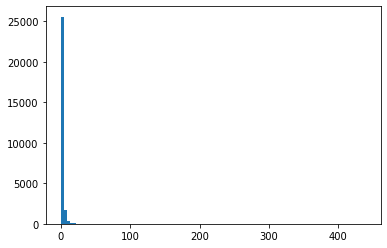

In [20]:
t=plt.hist(dif,bins=100)

looks like we have some heavy outliers! Look at the better samples:

In [21]:
dif_20=dif[dif<20]

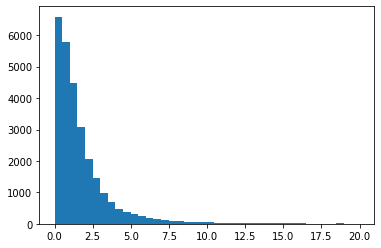

In [22]:
t=plt.hist(dif_20,bins=40)

Still, most predictions are less then 2$ off ...

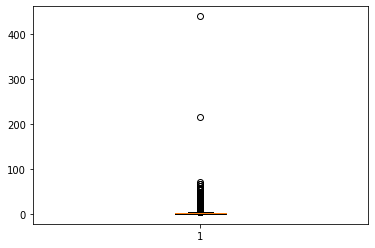

In [23]:
t=plt.boxplot(dif)

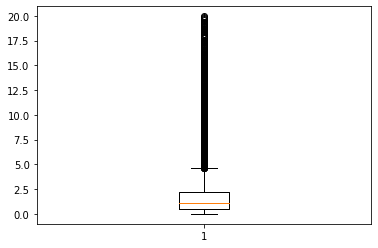

In [24]:
t=plt.boxplot(dif_20)

In [25]:
#now look at the median Error
np.median(dif)

1.1500000000000004

In [26]:
err_percent=dif[y_test>0]/y_test[y_test>0]

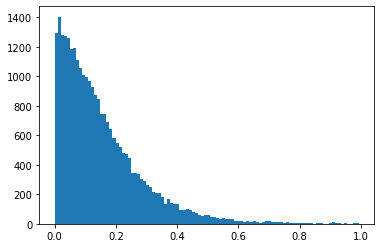

In [27]:
#look at Error in %
t=plt.hist(err_percent[err_percent<1.0],bins=100)

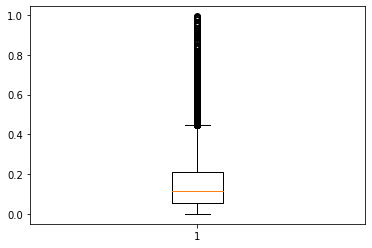

In [28]:
t=plt.boxplot(err_percent[err_percent<1.0])

In [29]:
#get all with an error > x for further investigation
bad_10 = X_test[dif>10]
bad_100 = X_test[dif>100]

In [30]:
np.shape(bad_10) #how many bas predictions do we have

(456, 31)

In [31]:
np.shape(bad_100)

(2, 31)

In [32]:
#Plot all high error predictions
error_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 12,)
for i in range(np.shape(bad_10)[0]):
    folium.CircleMarker([bad_10[i,1], bad_10[i,0]], radius=3,                
                        color="green", 
                        fill_opacity=0.9
                       ).add_to(error_map)
    folium.CircleMarker([bad_10[i,3], bad_10[i,2]], radius=3,                
                        color="red", 
                        fill_opacity=0.9
                       ).add_to(error_map)
    folium.PolyLine([ [bad_10[i,1],bad_10[i,0]] , [bad_10[i,3],bad_10[i,2]]  ], color="black", weight=2.5, opacity=1).add_to(error_map)

In [33]:
error_map

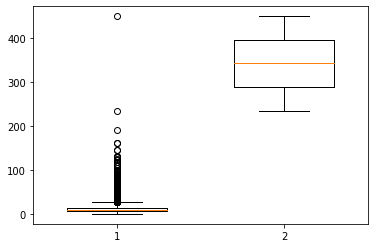

In [34]:
#look at the fare: left all test, right high error 
t=plt.boxplot(y_test,positions = [1], widths = 0.6)
t=plt.boxplot(y_test[dif>100],positions = [2], widths = 0.6)

In [35]:
#here one would keep looking at other variables to find out mor about failed predictions